In [1]:
# Required imports
import gempy as gp
import gempy_viewer as gpv
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.mask import mask
from rasterio.sample import sample_gen
import pyvista as pv

Setting Backend To: AvailableBackends.numpy


In [2]:
data_path = "../Tables/North"

# Path to the text file
file_path = data_path + "/Clipped/North_1_Int.txt"

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path, sep=',')
df

,Id,formation,X,Y,Z,geometry
0,0.0,Paleogene_Volcanic,482791.46,2151825.08,-44.02,POINT (482791.46 2151825.08)
1,0.0,Paleogene_Volcanic,483183.46,2151825.08,-19.67,POINT (483183.46 2151825.08)
2,0.0,Neogene_Volcanic,482649.57,2151825.08,427.48,POINT (482649.57 2151825.08)
3,0.0,Quaternary_alluvial,485893.28,2151825.08,1873.28,POINT (485893.28 2151825.08)
4,0.0,Quaternary_Lac,483803.68,2151825.08,1942.57,POINT (483803.68 2151825.08)
...,...,...,...,...,...,...
1839,0.0,Quaternary_volcanic,481592.27,2199688.38,1754.61,POINT (481592.27 2199688.38)
1840,0.0,Neogene_Lac,483933.15,2199688.38,1983.26,POINT (483933.15 2199688.38)
1841,0.0,Cretaceous_limestone,483891.65,2199688.38,-1000.00,POINT (483891.65 2199688.38)
1842,0.0,Cretaceous_limestone,496121.46,2199688.38,-1000.00,POINT (496121.46 2199688.38)


In [3]:
# Read the shapefile
file_path = '../Shapefiles/'
polygon_all = gpd.read_file(file_path + 'Model_Zones.shp')

# Filter by attribute value, for example 'Middle_1'
polygon = polygon_all[polygon_all['Zones'] == 'Extra']

# Get the boundaries
x_min = polygon.bounds.minx.min()
y_min = polygon.bounds.miny.min()
x_max = polygon.bounds.maxx.max()
y_max = polygon.bounds.maxy.max()


In [ ]:
# Find the maximum value
z_max = df['Z'].max()

# Find the minimum value
z_min = df['Z'].min()

print("x_max:", x_max, "y_max:", y_max, "z_max:", z_max)
print("x_min:", x_min, "y_min:", y_min, "z_min:", z_min)

x_max: 465132.9235601425 y_max: 2173584.5583953634 z_max: 2994.0
x_min: 445132.9235600941 y_min: 2152578.663726585 z_min: -1000.0


In [5]:
dx=25
dy=25
dz=50

Lx= x_max-x_min
Ly= y_max-y_min
Lz= z_max-z_min

print(Lx/dx, Ly/dy, Lz/dz)

800.0000000019371 840.2357867511362 79.88


In [6]:
geo_model = gp.create_geomodel(
    project_name='model',
    extent=[x_min, x_max, y_min, y_max, z_min - dz, z_max + dz],
    resolution=[dx, dy, dz],
    importer_helper=gp.data.ImporterHelper(
        path_to_surface_points=data_path + "/Clipped/North_1_Int.txt",  
        path_to_orientations=data_path + "/Clipped/North_1_Ori.txt"     
    )
)


c:\Users\juanc\miniconda3\envs\gempy3\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


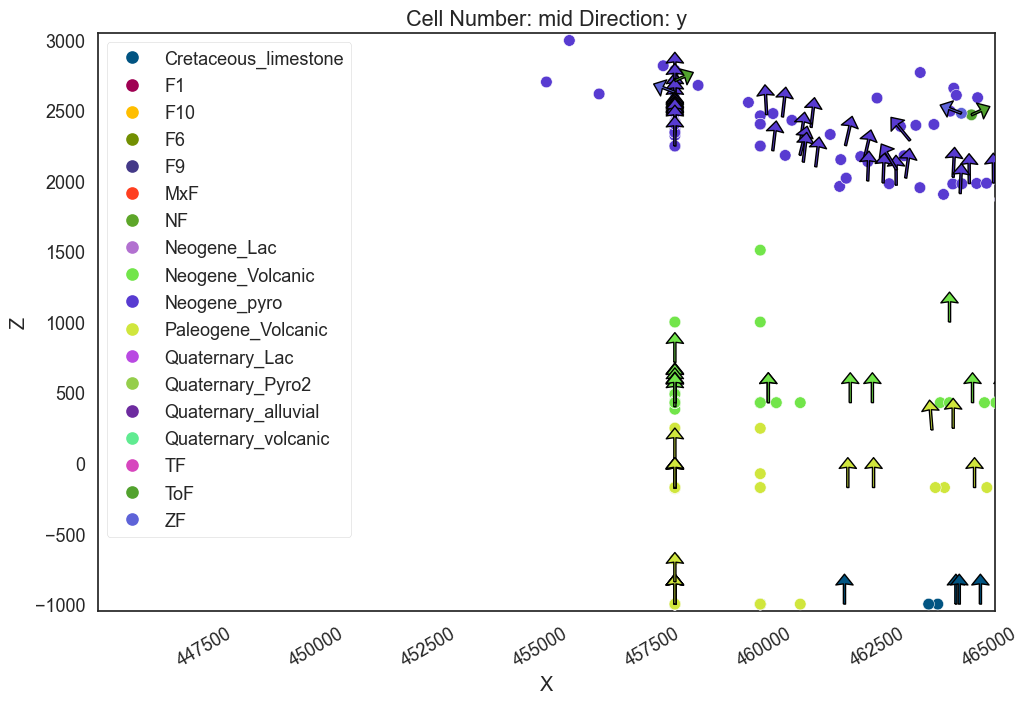

In [7]:
# Display a basic cross section of input data
gpv.plot_2d(geo_model)

In [8]:
# View structural frame
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Cretaceous_limestone,
	color=#015482,
	is_active=True
),
Element(
	name=F1,
	color=#9f0052,
	is_active=True
),
Element(
	name=F10,
	color=#ffbe00,
	is_active=True
),
Element(
	name=F6,
	color=#728f02,
	is_active=True
),
Element(
	name=F9,
	color=#443988,
	is_active=True
),
Element(
	name=MxF,
	color=#ff3f20,
	is_active=True
),
Element(
	name=NF,
	color=#5DA629,
	is_active=True
),
Element(
	name=Neogene_Lac,
	color=#b271d0,
	is_active=True
),
Element(
	name=Neogene_Volcanic,
	color=#72e54a,
	is_active=True
),
Element(
	name=Neogene_pyro,
	color=#583bd1,
	is_active=True
),
Element(
	name=Paleogene_Volcanic,
	color=#d0e63d,
	is_active=True
),
Element(
	name=Quaternary_Lac,
	color=#b949e2,
	is_active=True
),
Element(
	name=Quaternary_Pyro2,
	color=#95ce4b,
	is_active=True
),
Element(
	name=Quaternary_alluvial,
	color=#6d2b9f,
	is_active=True
),
Element(
	name=Quaternary_volcanic,
	color=#60eb91,
	is_active=True
),
Element(
	name=TF,
	color=#d746be,
	is_active=True
),
Element(
	name=ToF,
	color=#52a22e,
	is_active=True
),
Element(
	name=ZF,
	color=#5e63d8,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [9]:
del_surfaces = ["F1", "F9", "F10", "ZF", "TF", "MxF", "NF", "Neogene_Lac", "Quaternary_Lac", 
                "Quaternary_Pyro2", "Quaternary_alluvial", "Quaternary_volcanic", "Cretaceous_limestone"]
for s in del_surfaces:
    gp.remove_element_by_name(geo_model, s)

geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=F6,
	color=#728f02,
	is_active=True
),
Element(
	name=Neogene_Volcanic,
	color=#72e54a,
	is_active=True
),
Element(
	name=Neogene_pyro,
	color=#583bd1,
	is_active=True
),
Element(
	name=Paleogene_Volcanic,
	color=#d0e63d,
	is_active=True
),
Element(
	name=ToF,
	color=#52a22e,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [10]:
# Define structural groups and age/stratigraphic relationship
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={

        "F6":("F6"),
        "ToF":("ToF"),

        "N_P":("Neogene_pyro"),
        "N_V": ("Neogene_Volcanic"),
        "P_V": ("Paleogene_Volcanic"),
    }
)

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=F6,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=F6,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=ToF,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=ToF,
	color=#52a22e,
	is_active=True
)
]
),
StructuralGroup(
	name=N_P,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Neogene_pyro,
	color=#583bd1,
	is_active=True
)
]
),
StructuralGroup(
	name=N_V,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Neogene_Volcanic,
	color=#72e54a,
	is_active=True
)
]
),
StructuralGroup(
	name=P_V,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Paleogene_Volcanic,
	color=#d0e63d,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]],

In [11]:
# Define group as fault
gp.set_is_fault(geo_model, [ "ToF", "F6"])

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=F6,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=F6,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=ToF,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=ToF,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=N_P,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Neogene_pyro,
	color=#583bd1,
	is_active=True
)
]
),
StructuralGroup(
	name=N_V,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Neogene_Volcanic,
	color=#72e54a,
	is_active=True
)
]
),
StructuralGroup(
	name=P_V,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Paleogene_Volcanic,
	color=#d0e63d,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False,  True,  True,  True],
 [False, False,  True,  True,  True],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]],

In [12]:
gpv.plot_3d(geo_model, show_lith=True, show_boundaries=True, ve=None)

In [13]:
# Compute model
gp.compute_model(geo_model)

Setting Backend To: AvailableBackends.numpy
Chunking done: 33 chunks
Chunking done: 53 chunks
Chunking done: 53 chunks
Chunking done: 8 chunks
Chunking done: 8 chunks
Chunking done: 8 chunks
Chunking done: 8 chunks
Chunking done: 33 chunks
Chunking done: 54 chunks
Chunking done: 54 chunks


Solutions(4 Octree Levels, 5 DualContouringMeshes)

c:\Users\juanc\miniconda3\envs\gempy3\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


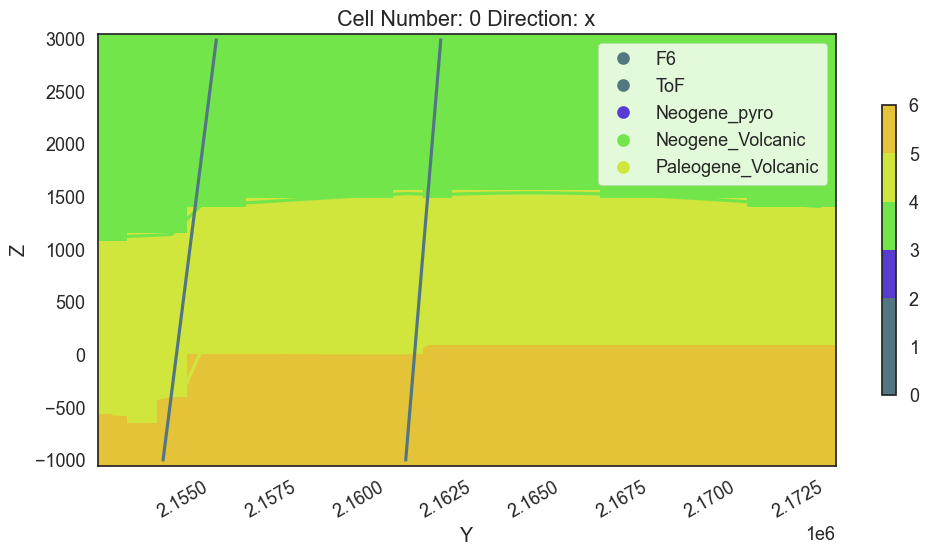

In [14]:
gpv.plot_2d(geo_model, cell_number=0, show_data=False, direction='x', ve=3)

In [15]:
p=gpv.plot_3d(geo_model, show_lith=True, show_data=True, image=False, show_boundaries=True)

### Migration to vtk

In [ ]:
box = p.regular_grid_actor.GetMapper().GetInput() # Get the vtk file for the regular grid

# === Load the DEM ===
with rasterio.open("../Dataset/Raster/cdmx.tif") as src:
    out_image, out_transform = mask(src, polygon.geometry, crop=True)
    elev = out_image[0].astype(float)
    transform = out_transform

    # Mark nodata values
    elev[elev == src.nodata] = np.nan   

    # Create X, Y coordinates
    nrows, ncols = elev.shape
    x = np.arange(ncols) * transform.a + transform.c
    y = np.arange(nrows) * transform.e + transform.f
    #y = y[::-1]  # Invertir eje Y para corregir orientación
    x, y = np.meshgrid(x, y)

# === Flatten and filter valid points ===
x_flat = x.ravel()
y_flat = y.ravel()
z_flat = elev.ravel()

valid_mask = np.isfinite(z_flat)
points = np.c_[x_flat[valid_mask], y_flat[valid_mask], z_flat[valid_mask]]

# === Create 3D Mesh ===
cloud = pv.PolyData(points)
surface = cloud.delaunay_2d()

# === Create a closed mesh from the DEM ===
surface = surface.elevation()  # ensures that it has scalar values
surface = surface.triangulate()

# === Cut the block with the surface ===
block_cortado = box.clip_surface(surface, invert=True)

block_cortado.save("../Results/Extra.vtk")

### Migration to numpy array

In [ ]:
# 1. Get the coordinates (x, y, z) of the grid
coordinates = geo_model.grid.regular_grid.values  # This is of form [n, 3], where each row is [x, y, z]

# 2. Obtain the lithology block
lith_block = geo_model.solutions.raw_arrays.lith_block  # This is a 1D array with the lithology IDs

# 3. Obtaining the names of lithologies from surfaces
lithology_names = geo_model.structural_frame.elements_names  # List of names of lithologies

# Make sure the number of coordinates and lithologies match
assert len(coordinates) == len(lith_block), "The dimensions of the coordinates and lithologies do not match."

# 4. Create the DataFrame with the information
data = []

# Traverse each voxel and associate the coordinates with the lithology
for i in range(len(coordinates)):
    x, y, z = coordinates[i]  # Coordinates
    lith_id = lith_block[i]  # Lithology ID
    
    # Check if the lithology ID is within the range of names
    if lith_id - 1 < len(lithology_names):
        lith_name = lithology_names[lith_id - 1]  # Name of the lithology
    else:
        lith_name = "Desconocida"  # If the ID is out of range, assign a generic name
    
    # Add the row with x, y, z, id and lithology name
    data.append([x, y, z, lith_id, lith_name])

# Create a DataFrame with the results
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'id', 'lithology_name'])

# Load the DEM
with rasterio.open("../Dataset/Raster/cdmx.tif") as dem:
    # Extract elevation from the DEM at points (x, y)
    coords = [(x, y) for x, y in zip(df['x'], df['y'])]
    elevaciones_dem = list(dem.sample(coords))
    # Convert from a list of lists to a flat list
    df['elev_dem'] = [val[0] if val else None for val in elevaciones_dem]

# Filter: Keep only points with z <= DEM elevation
df_filtrado = df[df['z'] <= df['elev_dem']]

# Save the result
df_filtrado.to_csv(("../Results/Extra.txt"),index=False)